# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.chdir('/Users/MichaelTwardos/Desktop/') #SET THIS WORKING DIRECTORY TO YOURS
data = pd.read_csv('rides.csv')

/Users/michaeltwardos/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
#Look at the data
data.head()

,hack_license,pickup_datetime,start_lat,start_lng,dropoff_datetime,end_lat,end_lng,distance_miles,duration_secs,passenger_count
0,58894369838B3783D30EEAA92B364BEB,2013-08-11 10:16:00,40.761032,-73.987091,2013-08-11 10:19:00,40.758083,-73.985519,0.34,180,1
1,6AC79A2B688191545021B8CF96ED385F,2013-08-11 10:00:00,40.773907,-73.873360,2013-08-11 10:15:00,40.648796,-73.782616,12.11,900,1
2,C52F793C850CD7CBCC1875FD79A9414C,2013-08-11 10:04:00,40.761890,-73.986977,2013-08-11 10:15:00,40.818638,-73.951485,5.56,660,1
3,5946C99EE9D4216C0A7395E525F2ED5F,2013-08-11 10:04:00,40.765141,-73.980568,2013-08-11 10:13:00,40.780441,-73.972839,1.44,540,6
4,7C228290C05CE8E37E0FE4C1B806DF88,2013-08-11 10:09:00,40.731152,-73.982193,2013-08-11 10:12:00,40.730576,-73.975960,0.62,180,1


In [3]:
#Characterize the Data
data.describe()

,start_lat,start_lng,end_lat,end_lng,distance_miles,duration_secs,passenger_count
count,2835723.000000,2835723.000000,2835715.000000,2835715.000000,2835723.000000,2835723.000000,2835723.000000
mean,40.749596,-73.975251,40.750119,-73.974743,2.967321,747.643958,1.743615
std,0.027221,0.036386,0.030818,0.035539,3.431376,541.307909,1.414146
min,40.080708,-74.673485,40.055046,-74.772507,0.000000,-10.000000,0.000000
25%,40.735657,-73.992622,40.734795,-73.991821,1.000000,367.000000,1.000000
50%,40.752319,-73.982330,40.752762,-73.981117,1.940000,600.000000,1.000000
75%,40.765671,-73.969101,40.766369,-73.966469,3.250000,960.000000,2.000000
max,41.758438,-71.757393,41.756645,-71.757393,50.000000,7200.000000,6.000000


In [329]:
# M((xp, yp),(xq, yq)) = α|xp − xq| + β|yp − yq|
import math
alpha = 84.2
beta = 11.1

def M(xp, yp, xq, yq):
    return alpha*abs(xp-xq) + beta*abs(yp-yq)
    
#Capital denote desired
#Lowercase denote actual
    
def f(XS, YS, XE, YE, xs, ys, xe, ye):
    startEnergy = M(XS, YS, xs, ys)
    endEnergy = M(XE, xe, YE, ye)
    prob = math.exp(-(startEnergy + endEnergy))
    return prob
    
    

In [318]:
# Remove the outliers / far trips
temp = data[(data['start_lat']>40.5) & (data['start_lat'] < 41.2) & (data['start_lng'] > -74.4) & (data['start_lng'] < -73.2)]
lessData =  temp[(temp['end_lat']>40.5) & (temp['end_lat'] < 41.2) & (temp['end_lng'] > -74.4) & (temp['end_lng'] < -73.2)]

# Visualize and Explore

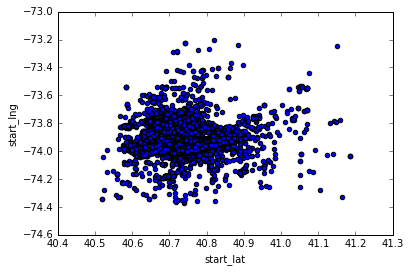

In [319]:
# df.plot(kind='scatter', x='a', y='b');
lessData.plot(kind ='scatter', x='start_lat', y= 'start_lng')

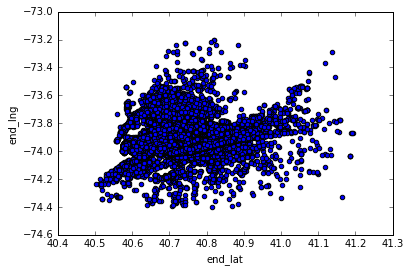

In [317]:
lessData.plot(kind ='scatter', x='end_lat', y= 'end_lng')

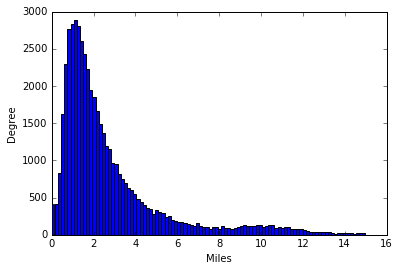

In [162]:
data[data.distance_miles<15]['distance_miles'].iloc[1:50000].plot(kind='hist', bins=100).set_xlabel("Miles")

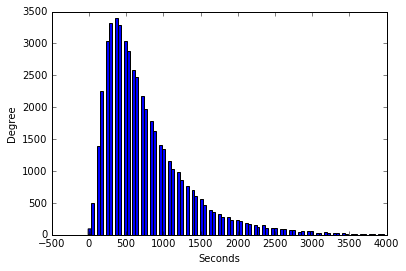

In [163]:
data[data.duration_secs<4000]['duration_secs'].iloc[1:50000].plot(kind='hist', bins=100).set_xlabel("Seconds")

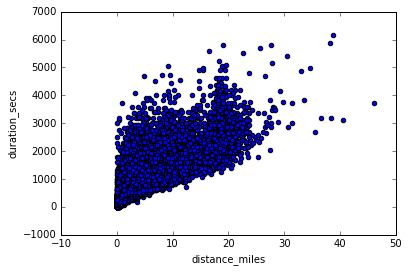

In [165]:
data.iloc[1:50000].plot(kind='scatter', x='distance_miles', y='duration_secs')

# Compute Hot Routes

In [150]:
# Here we will create a dictionary with lat and lng binned on grnlty 
# to count the frequency of each ride
grnlty =0.02
dict ={}
for index, row in lessData.iloc[0:500000].iterrows():
    route = (round(grnlty*math.floor(row['start_lat']/grnlty), 2), round(grnlty*math.floor(row['start_lng']/grnlty),2) , round(grnlty*math.floor(row['end_lat']/grnlty),2) , round(grnlty*math.floor(row['end_lng']/grnlty), 2) )    
    if route in dict.keys():
        dict[route]+=1
    else:
        dict[route]=1

In [320]:
# Here are the most popular trips in the data.
# Many of them start at the same gridpoint that they end up on.

tripFreq=sorted(dict.items(), key=lambda x: x[1], reverse=True)
tripFreq[1:10]

[((40.74, -74.0, 40.74, -73.98), 12387),
 ((40.74, -73.98, 40.74, -74.0), 11882),
 ((40.72, -74.0, 40.72, -74.0), 11125),
 ((40.72, -74.0, 40.74, -74.0), 11059),
 ((40.74, -74.0, 40.72, -74.0), 9740),
 ((40.74, -73.98, 40.74, -73.98), 8984),
 ((40.76, -73.98, 40.76, -73.98), 8899),
 ((40.76, -74.0, 40.74, -74.0), 8208),
 ((40.76, -73.98, 40.74, -74.0), 8163)]

In [321]:
tripFreqDF = pd.DataFrame([[item[0][0], item[0][1], item[0][2], item[0][3], item[1]] for item in tripFreq] ,  columns=['XS', 'YS', 'XE', 'YE', 'Rides'])

In [322]:
tripFreqDF.head()

,XS,YS,XE,YE,Rides
0,40.74,-74.00,40.74,-74.00,19459
1,40.74,-74.00,40.74,-73.98,12387
2,40.74,-73.98,40.74,-74.00,11882
3,40.72,-74.00,40.72,-74.00,11125
4,40.72,-74.00,40.74,-74.00,11059


In [325]:
# Find the most popular route for a given starting point
def findMostPopularDestination(xs, ys):
    return tripFreqDF[(tripFreqDF.XS==xs) & (tripFreqDF.YS == ys)].sort(['Rides'], ascending=False)

In [327]:
findMostPopularDestination(40.70, -73.94).iloc[0:2]

,XS,YS,XE,YE,Rides
848,40.7,-73.94,40.70,-73.96,29
1122,40.7,-73.94,40.68,-73.94,17


In [203]:
# Here we create a dictionary that captures popularity of a given starting point
# i.e. the overall demand for rides as a function of location.
grnlty =0.02
demand ={}
for index, row in lessData.iloc[0:500000].iterrows():
    depart = (round(grnlty*math.floor(row['start_lat']/grnlty), 2), round(grnlty*math.floor(row['start_lng']/grnlty),2)  )    
    if depart in demand.keys():
        demand[depart]+=1
    else:
        demand[depart]=1

In [288]:
demands=sorted(demand.items(), key=lambda x: x[1], reverse=True)
demandDF = pd.DataFrame([[d[0][0], d[0][1], d[1]] for d in demands] ,  columns=['XS', 'YS','Rides'])

In [330]:
# Now we will incorporate the probabiliy function, f, to measure inferred demand.
# Inferred demand accounts for the fact that a rider may walk from their current location
# to a ride that is available some distance away.
inferredDemand =[]
for XS in np.arange(demandDF['XS'].min(), demandDF['XS'].max(), 0.02):
    for YS in np.arange(demandDF['YS'].min(), demandDF['YS'].max(), 0.02):
        dem =[]
        for xs in np.arange(XS-0.1, XS + 0.1, 0.02):
            for ys in np.arange(YS-0.1, YS+0.1, 0.02):
                contribution = demandDF[(demandDF['XS']==round(xs,2)) & (demandDF['YS']==round(ys,2))] 
                if contribution['Rides'].mean() > 0:
                    dem.append(f(XS, YS,0, 0, xs, ys, 0, 0)*contribution['Rides'].mean())
        inferredDemand.append([round(XS,2), round(YS, 2), round(sum(dem), 2)])

In [333]:
inferredDemandDF = pd.DataFrame([[d[0], d[1], d[2]] for d in inferredDemand] ,  columns=['XS', 'YS','Demand'])

In [334]:
inferredDemandDF.head()

,XS,YS,Demand
0,40.5,-74.52,0
1,40.5,-74.50,0
2,40.5,-74.48,0
3,40.5,-74.46,0
4,40.5,-74.44,0


In [338]:
findMostPopularDestination(40.70, -73.94).iloc[0:2][['XE', 'YE']]

,XE,YE
848,40.70,-73.96
1122,40.68,-73.94


In [335]:
def findInferredDemand(xs, ys):
    return inferredDemandDF[(inferredDemandDF.XS==xs) & (inferredDemandDF.YS == ys)].sort(['Demand'], ascending=False)

In [390]:
# For a given starting location, the 'best route' considers the popularity of each route
# multiplied by the inferred demand for the routes end.   For example a route that may be less
# popular but takes riders to a location that has higher demand for the next ride should
# be selected over a more popular route that has an ending location with no demand.


def computeBestRoute(xs, ys):
    routes = findMostPopularDestination(xs, ys)
    options =[]
    for index, route in routes.iterrows():
        xe = route['XE']
        ye = route['YE']
        popularity = route['Rides']
        demand = findInferredDemand(xe, ye)['Demand'].mean()
        if [round(xe,2), round(ye,2)] != [xs, ys]:
            options.append([round(xe, 2), round(ye, 2), round(popularity*demand, 1)])
    return options
            

In [404]:
route = [[40.74, -74.02]]
options = computeBestRoute(40.74, -74.02)
nextRoute=sorted(options, key=lambda x: x[2], reverse=True)
for routes in nextRoute:
    if routes[0:2] not in route:
        route.append(routes[0:2])
        newLocation = routes[0:2]
        break
route

[[40.74, -74.02], [40.74, -74.0]]

In [411]:
def computeHotRoute(xs, ys, iterations):
    route = [[xs, ys]]
    newLocation = [xs, ys]
    for i in range(iterations):
        options = computeBestRoute(newLocation[0], newLocation[1])
        potentialNextRoute=sorted(options, key=lambda x: x[2], reverse=True)
        for routes in potentialNextRoute:
            if routes[0:2] not in route:
                route.append(routes[0:2])
                newLocation = routes[0:2]
                break
    return route
        

In [412]:
hotRoute = computeHotRoute(40.76, -74.0, 5)
hotRoute

[[40.76, -74.0],
 [40.74, -74.0],
 [40.74, -73.98],
 [40.76, -73.98],
 [40.76, -73.96],
 [40.72, -74.0]]

In [413]:
hotRoute = computeHotRoute(40.72, -74.0, 15)
hotRoute

[[40.72, -74.0],
 [40.74, -74.0],
 [40.74, -73.98],
 [40.76, -73.98],
 [40.76, -73.96],
 [40.76, -74.0],
 [40.74, -74.02],
 [40.72, -74.02],
 [40.7, -74.02],
 [40.7, -74.0],
 [40.72, -73.98],
 [40.76, -73.88],
 [40.78, -73.98],
 [40.78, -73.96],
 [40.78, -73.94],
 [40.8, -73.96]]

In [414]:
hotRoute =computeHotRoute(40.74, -74.0, 5)
hotRoute

[[40.74, -74.0],
 [40.74, -73.98],
 [40.76, -73.98],
 [40.76, -73.96],
 [40.76, -74.0],
 [40.72, -74.0]]